<a href="https://colab.research.google.com/github/lightituphome/Real-Estate-Linear-Regression-/blob/main/Real_Estate(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving Real estate.csv to Real estate.csv


{'Real estate.csv': b'No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area\r\n1,2012.917,32,84.87882,10,24.98298,121.54024,37.9\r\n2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2\r\n3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3\r\n4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8\r\n5,2012.833,5,390.5684,5,24.97937,121.54245,43.1\r\n6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1\r\n7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3\r\n8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7\r\n9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8\r\n10,2013.417,17.9,1783.18,3,24.96731,121.51486,22.1\r\n11,2013.083,34.8,405.2134,1,24.97349,121.53372,41.4\r\n12,2013.333,6.3,90.45606,9,24.97433,121.5431,58.1\r\n13,2012.917,13,492.2313,5,24.96515,121.53737,39.3\r\n14,2012.667,20.4,2469.645,4,24.96108,121.51046,23.8\r\n15,2013.500,13.2,1164.838,4,24.99156,121.53406,34.3\r\n16,2013.583

In [ ]:
data=pd.read_csv('Real estate.csv')

In [ ]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
data.shape

(414, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         No  X1 transaction date  X2 house age  \
0    False                False         False   
1    False                False         False   
2    False                False         False   
3    False                False         False   
4    False                False         False   
..     ...                  ...           ...   
409  False                False         False   
410  False                False         False   
411  False                False         False   
412  False                False         False   
413  False                False         False   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                     False                            False   
1                                     False                            False   
2                                     False                            False   
3                            

Data Analysis

In [ ]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<ipython-input-12-5925217efb91>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['X1 transaction date'])


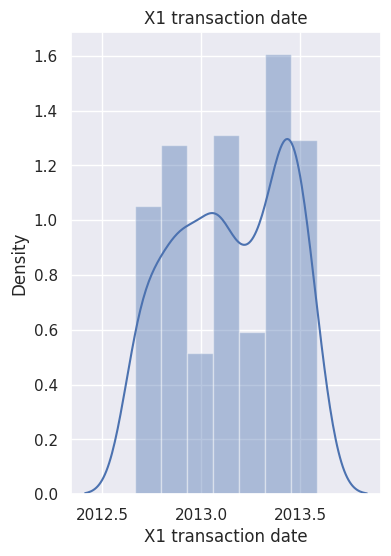

In [ ]:
sns.set()
plt.figure(figsize=(4,6))
sns.distplot(data['X1 transaction date'])
plt.title('X1 transaction date')
plt.show()

<ipython-input-18-c6e3afaf542f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['X2 house age'])


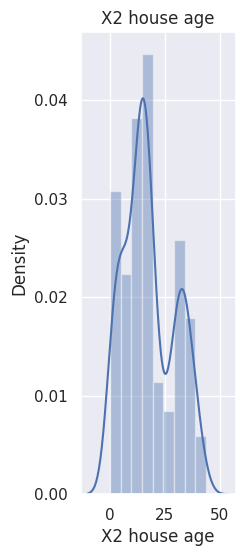

In [ ]:
plt.figure(figsize=(2,6))
sns.distplot(data['X2 house age'])
plt.title('X2 house age')
plt.show()

<Figure size 300x700 with 0 Axes>

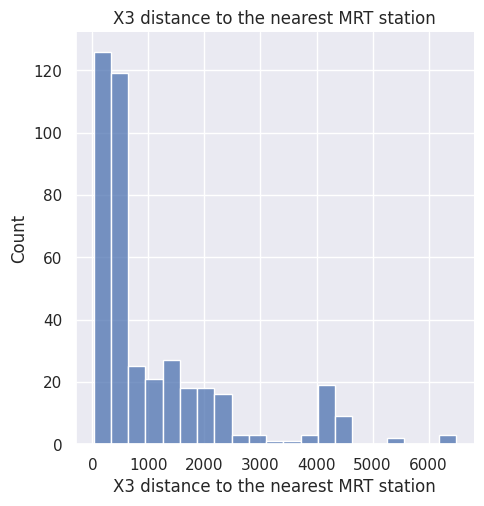

In [ ]:
plt.figure(figsize=(3,7))
sns.displot(data['X3 distance to the nearest MRT station'])
plt.title('X3 distance to the nearest MRT station')
plt.show()

<Figure size 400x900 with 0 Axes>

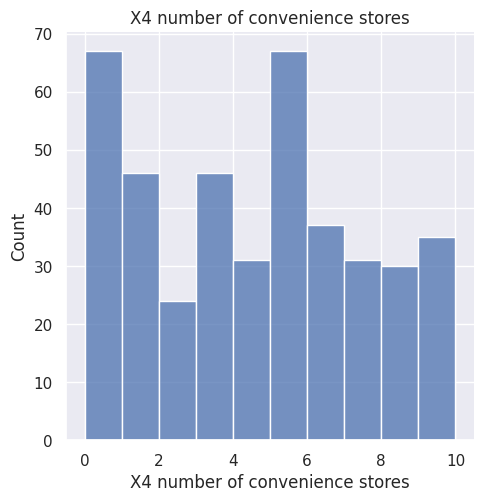

In [ ]:
plt.figure(figsize=(4,9))
sns.displot(data['X4 number of convenience stores'])
plt.title('X4 number of convenience stores')
plt.show()

<Figure size 200x400 with 0 Axes>

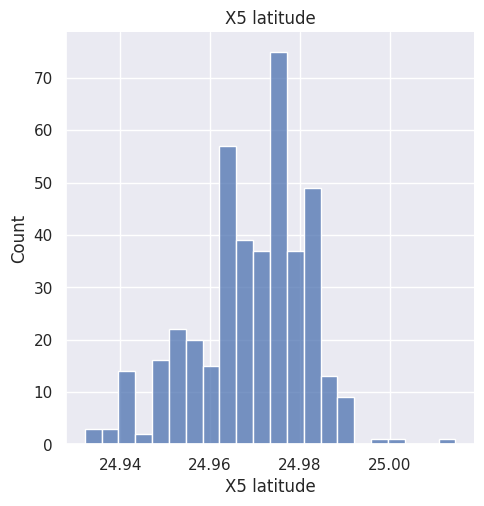

In [ ]:
plt.figure(figsize=(2,4))
sns.displot(data['X5 latitude'])
plt.title('X5 latitude')
plt.show()

<Figure size 700x200 with 0 Axes>

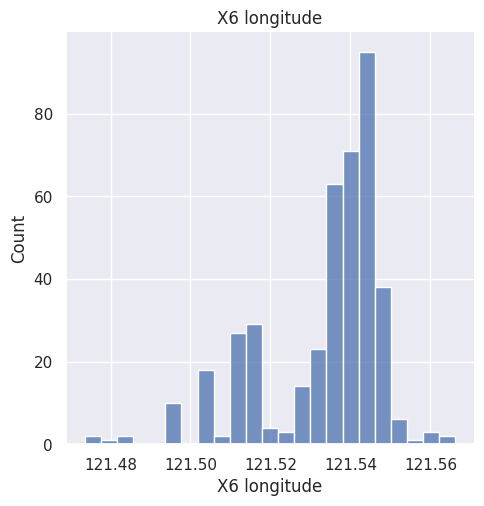

In [ ]:
plt.figure(figsize=(7,2))
sns.displot(data['X6 longitude'])
plt.title('X6 longitude')
plt.show()

<Figure size 300x900 with 0 Axes>

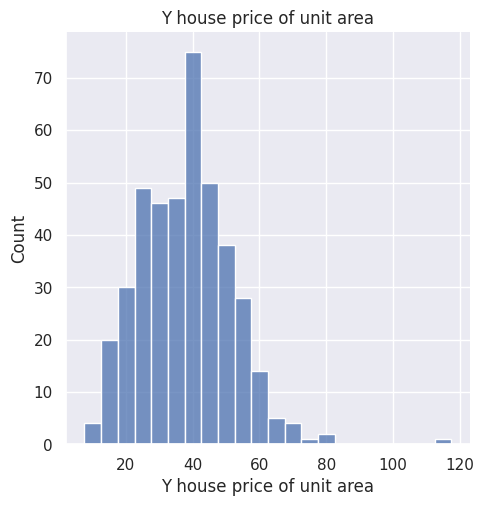

In [ ]:
sns.set()
plt.figure(figsize=(3,9))
sns.displot(data['Y house price of unit area'])
plt.title('Y house price of unit area')
plt.show()

Spliting the features and the target

In [ ]:
x=data.drop(columns='Y house price of unit area',axis=1)
y=data['Y house price of unit area']

In [ ]:
print(x)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [ ]:
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


Spliting the data training data and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(414, 7) (331, 7) (83, 7)


Model Training

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction=model.predict(x_train)

In [ ]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.5984567615084598


In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.5152898373983363


In [ ]:
input_data=(8,2013.417,20.3,287.6025,6,24.98042,121.54228)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[47.739257]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print('The house price of unit area is',prediction[0])

The house price of unit area is 47.73925700010295
